In [15]:
import numpy as np 
import pandas as pd 



import os
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1672954506256259794
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3198956339
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3177873449672632029
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [16]:
import os, shutil

original_dataset_dir = 'C:/Users/Mehmet/Desktop/Veriler/train'
#anaklasör oluşturuldu
base_dir = 'madenikagitpara412'
os.mkdir(base_dir)
#train klasörü oluşturuldu
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
#validation klasöürü oluşturuldu
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
#test klasörü oluşturuldu
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
#train klasörü içinde bozukpara klasörü oluşturuldu
train_bozukpara_dir = os.path.join(train_dir, 'bozukpara')
os.mkdir(train_bozukpara_dir)
#train klasörü içinde kagitpara klasörü oluşturuldu
train_kagitpara_dir = os.path.join(train_dir, 'kagitpara')
os.mkdir(train_kagitpara_dir)
#validation klasörü içinde bozukpara klasörü oluşturuldu
validation_bozukpara_dir = os.path.join(validation_dir, 'bozukpara')
os.mkdir(validation_bozukpara_dir)
#validation klasörü içinde kagitpara klasörü oluşturuldu
validation_kagitpara_dir = os.path.join(validation_dir, 'kagitpara')
os.mkdir(validation_kagitpara_dir)
#test klasörü içinde bozukpara klasörü oluşturuldu
test_bozukpara_dir = os.path.join(test_dir, 'bozukpara')
os.mkdir(test_bozukpara_dir)
#test klasörü içinde kagitpara klasörü oluşturuldu
test_kagitpara_dir = os.path.join(test_dir, 'kagitpara')
os.mkdir(test_kagitpara_dir)
#data setteki ilk 50 bozuk para resmi kopyalanıyor
fnames = ['bozukpara.{}.jpg'.format(i) for i in range(50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_bozukpara_dir, fname)
    shutil.copyfile(src, dst)
    #data setteki 50-75 arasındaki bozuk para resmi kopyalanıyor
fnames = ['bozukpara.{}.jpg'.format(i) for i in range(50, 75)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,  fname)
    dst = os.path.join(validation_bozukpara_dir, fname)
    shutil.copyfile(src, dst)
    #data setteki 75-100 arasındaki bozuk para resmi kopyalanıyor
fnames = ['bozukpara.{}.jpg'.format(i) for i in range(75, 104)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bozukpara_dir, fname)
    shutil.copyfile(src, dst)
    #data setteki ilk 75 kagit para resmi kopyalanıyor
fnames = ['kagitpara.{}.jpg'.format(i) for i in range(75)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_kagitpara_dir, fname)
    shutil.copyfile(src, dst)
    #data setteki 75-121 kagit para resmi kopyalanıyor
fnames = ['kagitpara.{}.jpg'.format(i) for i in range(75, 121)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_kagitpara_dir, fname)
    shutil.copyfile(src, dst)
    #data setteki 121-167 kagit para resmi kopyalanıyor
fnames = ['kagitpara.{}.jpg'.format(i) for i in range(121, 167)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_kagitpara_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
from keras import layers
from keras import models
from keras.layers import Dropout
#model oluşturuyoruz
model = models.Sequential()
# 32 adet 3*3 boyutunda filtreleler oluşuruyoruz ve modele ekliyoruz.
# input shape fotoğrafa çerçeve ekliyoruz giriş işe çıkış eşitlenir.
# Relu activasyon fonksiyonu kullanıyoruz.
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
## 2*2 boyutunda çerçeve oluşturuypruz
## kendisine gelen resim örneğini her alanı maksimum bir tek değere
##ingirger ve çakışmayan dikdörtgenlere bölüp transform etmek şeklinde çalışır

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

#2boyuttan 1boyutlu matrise çevir
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36992)             0         
__________

In [25]:
import keras
from keras import optimizers
#RMSprop optimizasyon fonksiyonumuzu 
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# Eğitilecek olan modelde kullanacağımız optimizasyon ve hata hesaplama fonksiyonumuzu belirleme:
# Sınıflandırma yapacağımız için "binary_crossentropy" fonksiyonunu kullanıyoruz.
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator
# Resimleri normalize işlemleri
#yeniden ölçülendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
#resim boyut 150*150
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')

Found 125 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [27]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [51]:
## modelimizi eğitiyoruz.
history = model.fit_generator(
                train_generator,
                steps_per_epoch = 100,
                epochs = 10,
                validation_data = validation_generator,
                validation_steps = 20)

Epoch 1/10
100/100 [==============================] - 52s 520ms/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 2/10
100/100 [==============================] - 58s 576ms/step - loss: 0.0159 - acc: 0.9947 - val_loss: 0.0320 - val_acc: 0.9714
Epoch 3/10
100/100 [==============================] - 66s 665ms/step - loss: 0.0188 - acc: 0.9942 - val_loss: 0.0715 - val_acc: 0.9849
Epoch 4/10
100/100 [==============================] - 65s 652ms/step - loss: 0.0356 - acc: 0.9913 - val_loss: 0.0342 - val_acc: 0.9871
Epoch 5/10
100/100 [==============================] - 63s 631ms/step - loss: 0.0231 - acc: 0.9936 - val_loss: 0.0771 - val_acc: 0.9857
Epoch 6/10
100/100 [==============================] - 67s 673ms/step - loss: 0.0303 - acc: 0.9926 - val_loss: 0.1399 - val_acc: 0.9871
Epoch 7/10
100/100 [==============================] - 66s 663ms/step - loss: 0.0241 - acc: 0.9933 - val_loss: 0.0372 - val_acc: 0.9849
Epoch 8/10
100/100 [==============================] - 6

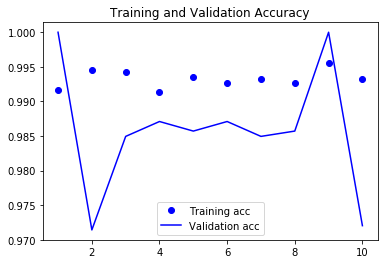

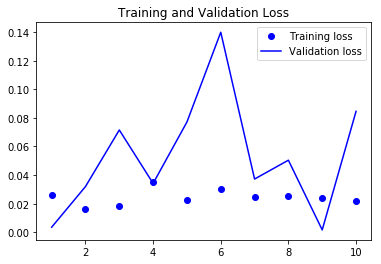

In [52]:
import matplotlib.pyplot as plt
##tabloda gösterme işlemleri
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
#########################
#over fitting mevcut bir sonrakinde epochu biraz daha arttıralım


In [31]:
from keras import layers
from keras import models
from keras.layers import Dropout
#model oluşturuyoruz
model = models.Sequential()
# 32 adet 3*3 boyutunda filtreleler oluşuruyoruz ve modele ekliyoruz.
# input shape fotoğrafa çerçeve ekliyoruz giriş işe çıkış eşitlenir.
# Relu activasyon fonksiyonu kullanıyoruz.
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
## 2*2 boyutunda çerçeve oluşturuypruz
## kendisine gelen resim örneğini her alanı maksimum bir tek değere
##ingirger ve çakışmayan dikdörtgenlere bölüp transform etmek şeklinde çalışır

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

#2boyuttan 1boyutlu matrise çevir
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)             0         
__________

In [33]:
import keras
from keras import optimizers
from keras.utils import to_categorical
#RMSprop optimizasyon fonksiyonumuzu 
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# Eğitilecek olan modelde kullanacağımız optimizasyon ve hata hesaplama fonksiyonumuzu belirleme:
# Sınıflandırma yapacağımız için "binary_crossentropy" fonksiyonunu kullanıyoruz.
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [34]:
from keras.preprocessing.image import ImageDataGenerator
# Resimleri normalize işlemleri
#yeniden ölçülendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
#resim boyut 150*150
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')

Found 125 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [36]:
## modelimizi eğitiyoruz.
history = model.fit_generator(
                train_generator,
                steps_per_epoch = 100,
                epochs = 15,
                validation_data = validation_generator,
                validation_steps = 20)

Epoch 1/15
100/100 [==============================] - 18s 182ms/step - loss: 0.6039 - acc: 0.6810 - val_loss: 0.3164 - val_acc: 0.9155
Epoch 2/15
100/100 [==============================] - 19s 194ms/step - loss: 0.3010 - acc: 0.8775 - val_loss: 0.2686 - val_acc: 0.8873
Epoch 3/15
100/100 [==============================] - 20s 204ms/step - loss: 0.2285 - acc: 0.9130 - val_loss: 0.2058 - val_acc: 0.9155
Epoch 4/15
100/100 [==============================] - 19s 193ms/step - loss: 0.1443 - acc: 0.9505 - val_loss: 0.2068 - val_acc: 0.9155
Epoch 5/15
100/100 [==============================] - 20s 202ms/step - loss: 0.0766 - acc: 0.9825 - val_loss: 0.2926 - val_acc: 0.9014
Epoch 6/15
100/100 [==============================] - 25s 248ms/step - loss: 0.0368 - acc: 0.9940 - val_loss: 0.2504 - val_acc: 0.9014
Epoch 7/15
100/100 [==============================] - 21s 215ms/step - loss: 0.0210 - acc: 0.9960 - val_loss: 0.3066 - val_acc: 0.9155
Epoch 8/15
100/100 [==============================] - 2

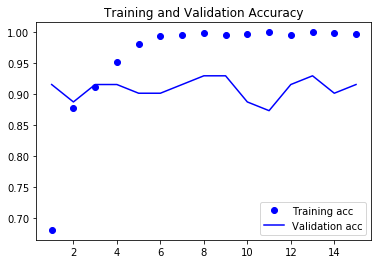

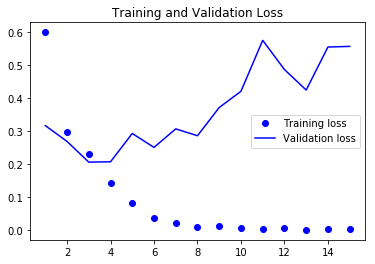

In [37]:
import matplotlib.pyplot as plt
##tabloda gösterme işlemleri
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [56]:
model.save('metalkagitpara3.h5')

In [ ]:
##Epoch 15e çıkartıldı.
#Öğrenememiş Loss değerleri yüksek

In [ ]:
###dropout ve augmentationları ekleyerek  sonuçlarını görelim

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0001),
             metrics=['acc'])

In [41]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                train_dir,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode = 'binary')

history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 100,
                            epochs = 15,
                            validation_data = validation_generator,
                            validation_steps = 50)

Found 125 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
Epoch 1/15
100/100 [==============================] - 61s 615ms/step - loss: 0.5361 - acc: 0.6955 - val_loss: 0.3238 - val_acc: 0.9150
Epoch 2/15
100/100 [==============================] - 57s 573ms/step - loss: 0.4185 - acc: 0.8033 - val_loss: 0.4667 - val_acc: 0.8034
Epoch 3/15
100/100 [==============================] - 57s 573ms/step - loss: 0.3458 - acc: 0.8387 - val_loss: 0.3379 - val_acc: 0.8868
Epoch 4/15
100/100 [==============================] - 76s 756ms/step - loss: 0.3093 - acc: 0.8622 - val_loss: 0.2913 - val_acc: 0.8875
Epoch 5/15
100/100 [==============================] - 73s 726ms/step - loss: 0.2753 - acc: 0.8815 - val_loss: 0.3381 - val_acc: 0.9013
Epoch 6/15
100/100 [==============================] - 61s 610ms/step - loss: 0.2391 - acc: 0.9005 - val_loss: 0.1433 - val_acc: 0.9447
Epoch 7/15
100/100 [==============================] - 61s 613ms/step - loss: 0.2142 - acc: 0.9083 - val_loss:

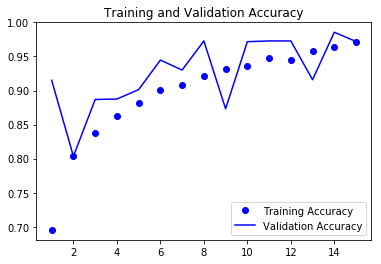

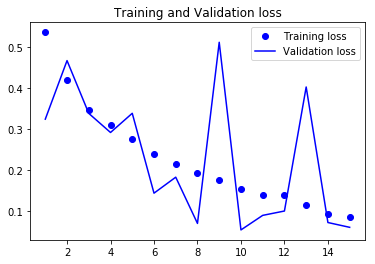

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [55]:
model.save('metalkagitpara2.h5')

In [ ]:
### 8-10 ve 12-14 arası overfit mevcut
#biraz daha optimize edilmesi gerek


In [44]:

#overfittingi azaltmak için augmentation değişik tranformasyonlar ile eldeki resimleri
#ilk kez gördüğü resimler haline getirme işlemidir.
#döndürme zoomlama işlemleri yapılır ve resimler çoğaltılır.
datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

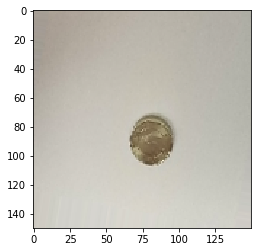

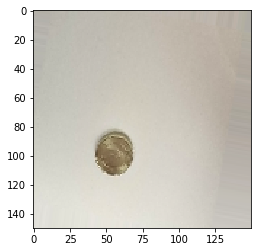

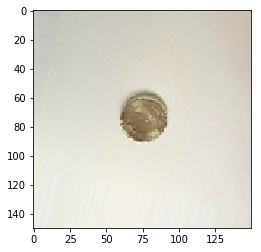

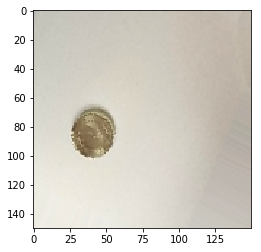

In [45]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_bozukpara_dir, fname) for fname in os.listdir(train_bozukpara_dir)]

img_path = fnames[49]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
#ağırlık regülarizasyonu 1e-4 olarak değiştirildi.

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [49]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                train_dir,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size = (150, 150),
                                batch_size = 32,
                                class_mode = 'binary')

history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 100,
                            epochs = 30,
                            validation_data = validation_generator,
                            validation_steps = 50)

Found 125 images belonging to 2 classes.
Found 71 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 52s 524ms/step - loss: 0.6454 - acc: 0.6024 - val_loss: 0.6227 - val_acc: 0.6483
Epoch 2/30
100/100 [==============================] - 54s 543ms/step - loss: 0.4675 - acc: 0.7492 - val_loss: 0.5482 - val_acc: 0.7889
Epoch 3/30
100/100 [==============================] - 68s 676ms/step - loss: 0.4000 - acc: 0.8153 - val_loss: 0.6032 - val_acc: 0.7881
Epoch 4/30
100/100 [==============================] - 75s 748ms/step - loss: 0.3456 - acc: 0.8461 - val_loss: 0.4431 - val_acc: 0.8317
Epoch 5/30
100/100 [==============================] - 72s 724ms/step - loss: 0.3035 - acc: 0.8691 - val_loss: 0.1660 - val_acc: 0.9566
Epoch 6/30
100/100 [==============================] - 60s 595ms/step - loss: 0.2630 - acc: 0.8896 - val_loss: 0.3570 - val_acc: 0.8868
Epoch 7/30
100/100 [==============================] - 62s 620ms/step - loss: 0.2293 - acc: 0.9040 - val_loss:

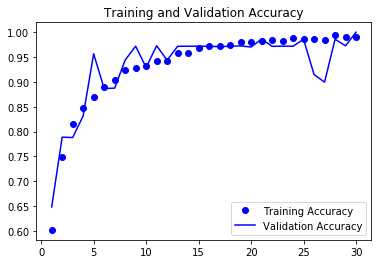

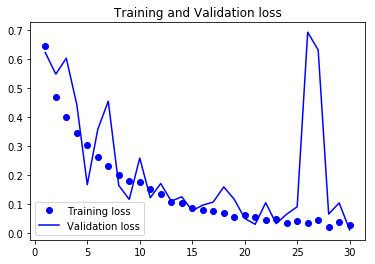

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
##Modelide biraz iyileşme görülmektedir.
## iyileştirmek için biraz daha eğitim verisi eklenebilir. farklı modeller denenebilir.
##25-28 arası over fitting mevcut 

In [54]:
model.save('metalkagitpara1.h5')